In [1]:
library(tidyverse) 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "airlines-flights-data"

The data set I am using can be accessed and used under a Open Database Contents License.

Source: https://www.kaggle.com/datasets/rohitgrewal/airlines-flights-data.

In [2]:
flight_data <- read_csv("/kaggle/input/airlines-flights-data/airlines_flights_data.csv")

Rows: 300153 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): airline, flight, source_city, departure_time, stops, arrival_time, ...
dbl (4): index, duration, days_left, price

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data Cleaning

In [3]:

colSums(is.na(flight_data)) #there are 0 NA values in each column


sum(duplicated(flight_data)) #and there are no duplicates


summary(flight_data) #I also took a quick look on the overall structure and basic statistics of the dataset

index          airline           flight      source_city 
               0                0                0                0 
  departure_time            stops     arrival_time destination_city 
               0                0                0                0 
           class         duration        days_left            price 
               0                0                0                0

[1] 0

     index          airline             flight          source_city       
 Min.   :     0   Length:300153      Length:300153      Length:300153     
 1st Qu.: 75038   Class :character   Class :character   Class :character  
 Median :150076   Mode  :character   Mode  :character   Mode  :character  
 Mean   :150076                                                           
 3rd Qu.:225114                                                           
 Max.   :300152                                                           
 departure_time        stops           arrival_time       destination_city  
 Length:300153      Length:300153      Length:300153      Length:300153     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
             

## Analyze

Throughout this section I left some comments with my insights after analyzing each question, but the summary of my findings will be shared later in a later section of my study.


### Question 1:
#### How do flight prices vary across different airlines? Are some airlines consistently more expensive or affordable than others?


In [4]:
average_prices <- flight_data %>%
group_by(airline) %>%
  summarise(
    Average_Price = mean(price, na.rm = TRUE)
  ) %>%
  arrange(desc(Average_Price))

print(average_prices) 

# A tibble: 6 × 2
  airline   Average_Price
  <chr>             <dbl>
1 Vistara          30397.
2 Air_India        23507.
3 SpiceJet          6179.
4 GO_FIRST          5652.
5 Indigo            5324.
6 AirAsia           4091.


Saving 12.5 x 6.67 in image


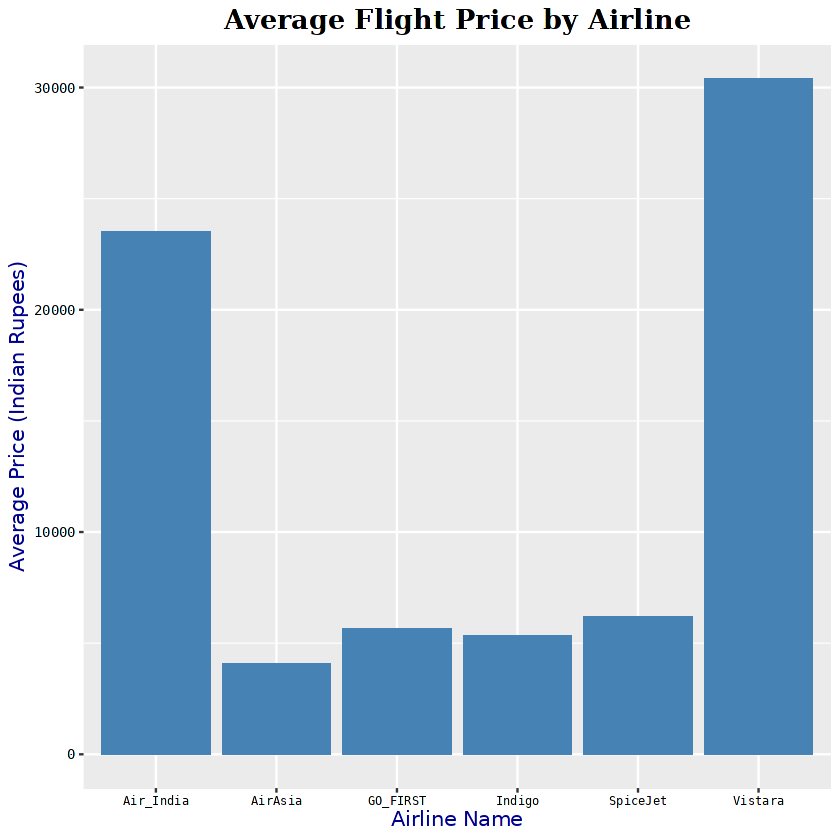

In [5]:
ggplot(data = average_prices) +
  geom_col(mapping = aes(x = airline, y = Average_Price),
           fill = "steelblue") +
  labs(
    x = "Airline Name",
    y = "Average Price (Indian Rupees)",
    title = "Average Flight Price by Airline"
  ) +
  theme(
    # did some styling to make the plot more visually appealing
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold", family = "serif"),
    
    
    axis.title.x = element_text(size = 12, face = "italic", color = "darkblue", family = "sans"),
    axis.title.y = element_text(size = 12, face = "italic", color = "darkblue", family = "sans"),
    
    
    axis.text.x = element_text(size = 7, color = "black", family = "mono"),
    axis.text.y = element_text(size = 8, color = "black", family = "mono")
  )
ggsave("/kaggle/working=Q1_1.png")

While the initial analysis showed big price differences between airlines, this doesn't tell the whole story. The overall average price can be misleading because it's influenced by many factors, like how long a flight is, the travel class, and the specific route.

To get a clearer, more accurate comparison, we'll focus on a single, standardized scenario. We will analyze the average ticket price for each airline on the Delhi to Mumbai route, looking only at direct flights in Economy class. This controlled approach will reveal the true pricing differences under identical conditions.

In [30]:
delhi_mumbai_flights <- flight_data %>%
  filter(class == "Economy", stops == "zero")


In [7]:
"""
My main focus was on the airlines in this question and not on the daily changes in prices

average_prices_same_category <- delhi_mumbai_flights %>%
  group_by(departure_time, airline) %>%
  summarise(
    Average_Price = mean(price, na.rm = TRUE),
    .groups = "drop"  
  ) %>%
  arrange(departure_time, airline)
"""

In [31]:
average_prices_same_category <- delhi_mumbai_flights %>%
  group_by(airline) %>%
  summarise(
    Average_Price = mean(price, na.rm = TRUE),
    .groups = "drop"  
  ) %>%
  arrange(airline)

In [38]:
print(average_prices_same_category)

# A tibble: 6 × 2
  airline   Average_Price
  <chr>             <dbl>
1 AirAsia           3748.
2 Air_India         4062.
3 GO_FIRST          3527.
4 Indigo            4023.
5 SpiceJet          4556.
6 Vistara           4125.


Saving 12.5 x 6.67 in image


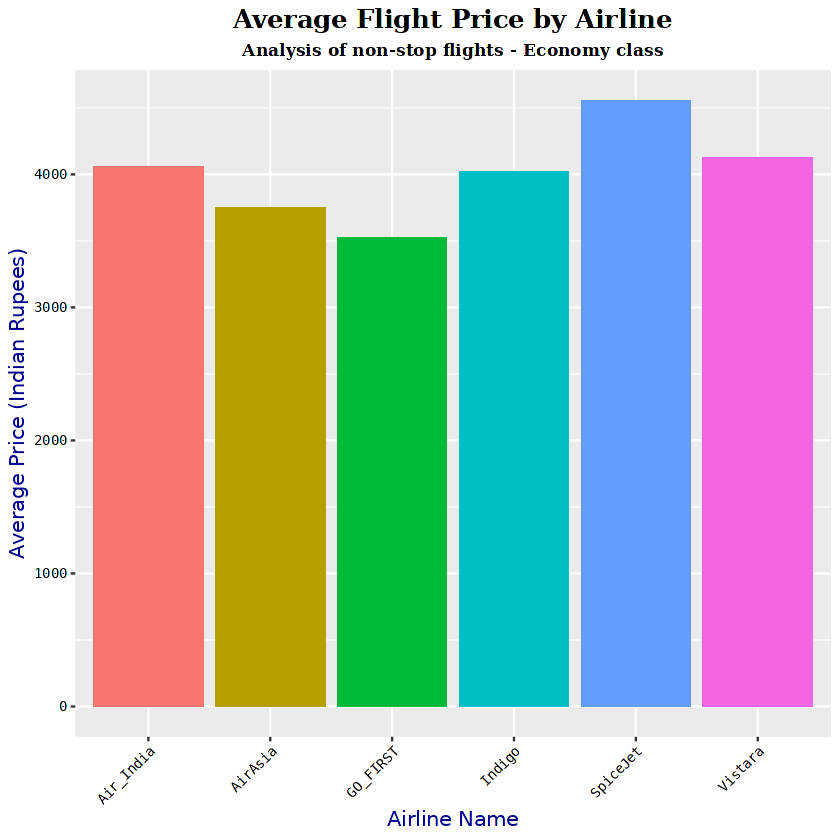

In [36]:
ggplot(data = average_prices_same_category) +
  geom_col(mapping = aes(x = airline, y = Average_Price, fill = airline)) +
  labs(
    x = "Airline Name",
    y = "Average Price (Indian Rupees)",
    title = "Average Flight Price by Airline",
    subtitle = "Analysis of non-stop flights - Economy class"
  ) +
  theme(
    plot.title = element_text(hjust = 0.5, size = 15, face = "bold", family = "serif"),
    plot.subtitle = element_text(hjust = 0.5, size = 10, face = "bold", family = "serif"),
    axis.title.x = element_text(size = 12, face = "italic", color = "darkblue", family = "sans"),
    axis.title.y = element_text(size = 12, face = "italic", color = "darkblue", family = "sans"),
    axis.text.x = element_text(size = 8, color = "black", family = "mono", angle = 45, hjust = 1),
    axis.text.y = element_text(size = 8, color = "black", family = "mono"),
    legend.position = "None"   
  )
ggsave("/kaggle/working/Q2_2.png")

We can clearly see now that the reason behind the extraordinary high peaks of Air India and Vistara was beacause they also offer business tickets not just Economy. As the main focus of the question was consistency, in a span of a daily operation Indigo seems to offer the highest ticket prices in almost each category.

In [9]:
average_prices_by_airline <- delhi_mumbai_flights %>%
  group_by(airline) %>%
  summarise(
    Average_Price = mean(price, na.rm = TRUE),
    Average_Duration_Mins = mean(duration, na.rm = TRUE)* 60,
    .groups = "drop" 
  ) %>%
  # Create a new metric: average price per minute
  mutate(
    Avg_Rupee_Per_Min = Average_Price / Average_Duration_Mins
  ) %>%
  arrange(Avg_Rupee_Per_Min)

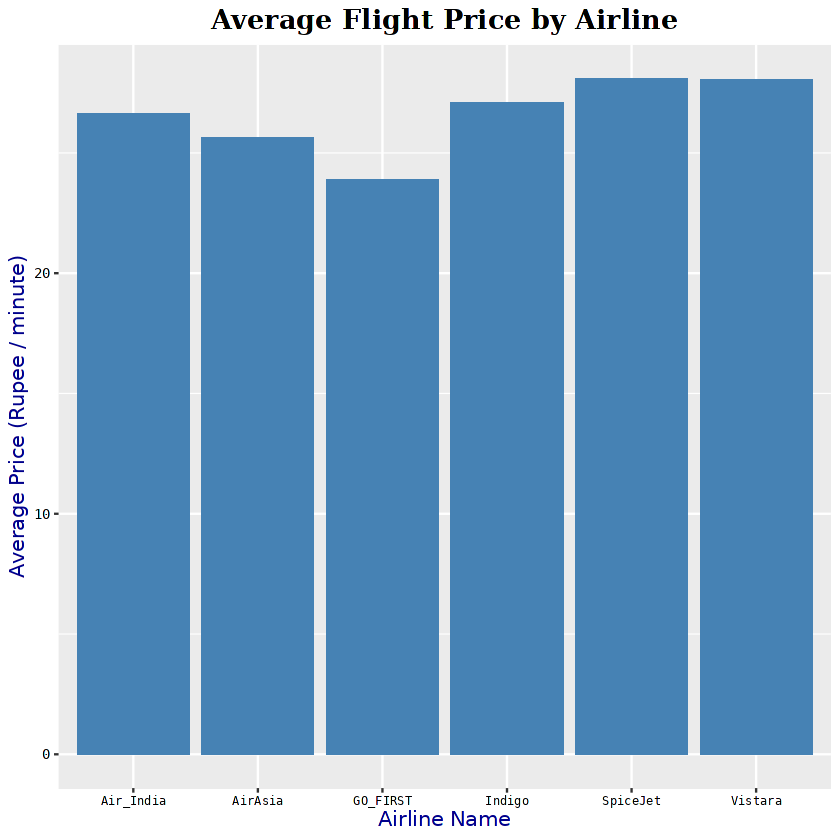

In [10]:
ggplot(data = average_prices_by_airline) +
  geom_col(mapping = aes(x = airline, y = Avg_Rupee_Per_Min), # Corrected column name here
           fill = "steelblue") +
  labs(
    x = "Airline Name",
    y = "Average Price (Rupee / minute)",
    title = "Average Flight Price by Airline"
  ) +
  theme(
    # Did some styling to make the plot more visually appealing
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold", family = "serif"),
    
    axis.title.x = element_text(size = 12, face = "italic", color = "darkblue", family = "sans"),
    axis.title.y = element_text(size = 12, face = "italic", color = "darkblue", family = "sans"),
    
    axis.text.x = element_text(size = 7, color = "black", family = "mono"),
    axis.text.y = element_text(size = 8, color = "black", family = "mono")
  )


In [11]:
average_prices_by_airline <- delhi_mumbai_flights %>%
  group_by(airline) %>%
  summarise(
    Average_Duration_Mins = mean(duration, na.rm = TRUE)* 60,
    
  ) %>%arrange(desc(Average_Duration_Mins))

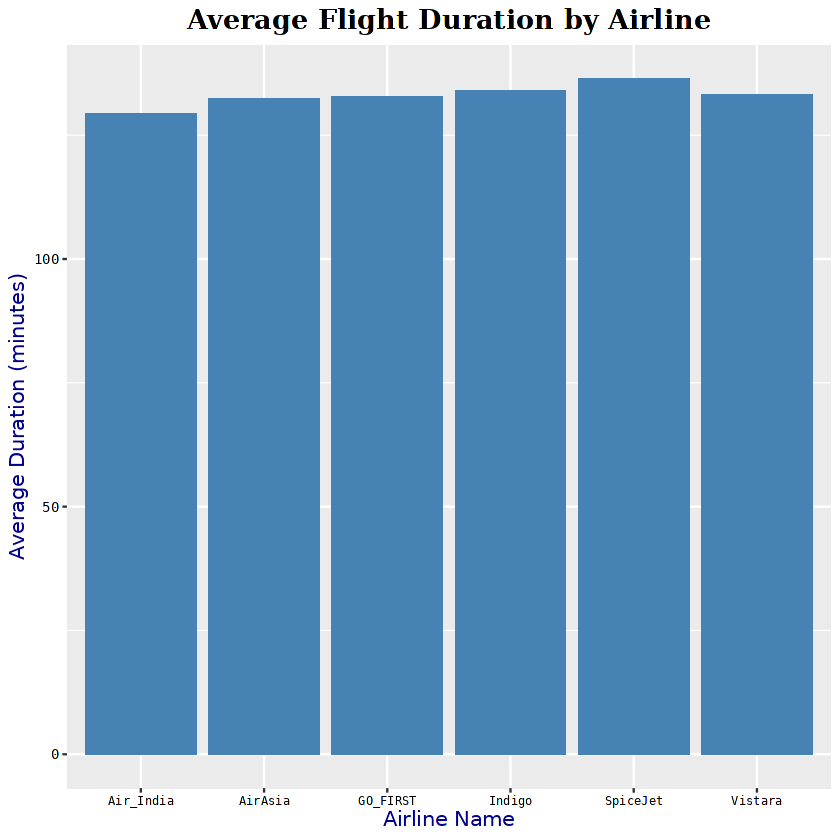

In [12]:
ggplot(data = average_prices_by_airline) +
  geom_col(mapping = aes(x = airline, y = Average_Duration_Mins), 
           fill = "steelblue") +
  labs(
    x = "Airline Name",
    y = "Average Duration (minutes)", 
    title = "Average Flight Duration by Airline" 
  ) +
  theme(
    # Did some styling to make the plot more visually appealing
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold", family = "serif"),
    
    axis.title.x = element_text(size = 12, face = "italic", color = "darkblue", family = "sans"),
    axis.title.y = element_text(size = 12, face = "italic", color = "darkblue", family = "sans"),
    
    axis.text.x = element_text(size = 7, color = "black", family = "mono"),
    axis.text.y = element_text(size = 8, color = "black", family = "mono")
  )

I did not include these in my final report because they reveal information that we already had.

### Question 2:
#### Does the number of stops (direct, one stop, two or more stops) significantly affect the flight price? If so, what is the typical price difference?


In [13]:
economy_flights <- flight_data %>% 
  filter(class == "Economy")

In [14]:
average_prices_and_stops <- economy_flights %>%
  group_by(stops) %>% 
  summarise(
    Average_Price = mean(price, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  arrange(desc(Average_Price))

In [39]:
print(average_prices_and_stops)

# A tibble: 3 × 2
  stops       Average_Price
  <chr>               <dbl>
1 two_or_more         9142.
2 one                 6813.
3 zero                4013.


Saving 12.5 x 6.67 in image


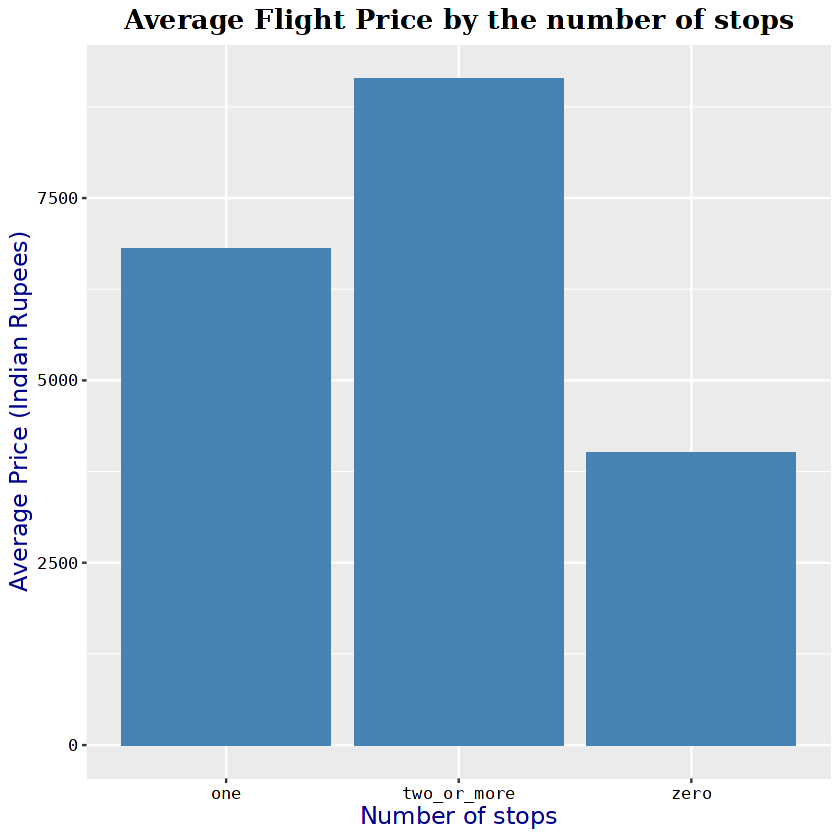

In [40]:
ggplot(data = average_prices_and_stops) +
  geom_col(mapping = aes(x = stops, y = Average_Price), fill = "steelblue" ) +
  labs(
    x = "Number of stops",
    y = "Average Price (Indian Rupees)",
    title = "Average Flight Price by the number of stops",
  ) +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold", family = "serif"),
    axis.title.x = element_text(size = 14, face = "italic", color = "darkblue", family = "sans"),
    axis.title.y = element_text(size = 14, face = "italic", color = "darkblue", family = "sans"),
    axis.text.x = element_text(size = 10, color = "black", family = "mono"), # Rotate text
    axis.text.y = element_text(size = 10, color = "black", family = "mono"),
   
  )
ggsave("/kaggle/working/Q3_1.png")

To keep the consistency, I have created a filter again, so we are working with the economy class againg. The reason behind this is that all airlines have economy class therefore we are working with a larger sample size compared to if we would have made a filter to look for business class only. We can see a 2000 - 3000 rupee additional cost as the number of stops increase.

### Question 3:
#### Is there a direct relationship or correlation between the duration of a flight and its price? Do longer flights necessarily mean higher costs?


In [43]:
duration_and_cost_economy <- flight_data %>% filter(class == "Economy") 

`geom_smooth()` using formula = 'y ~ x'
Saving 12.5 x 6.67 in image
`geom_smooth()` using formula = 'y ~ x'


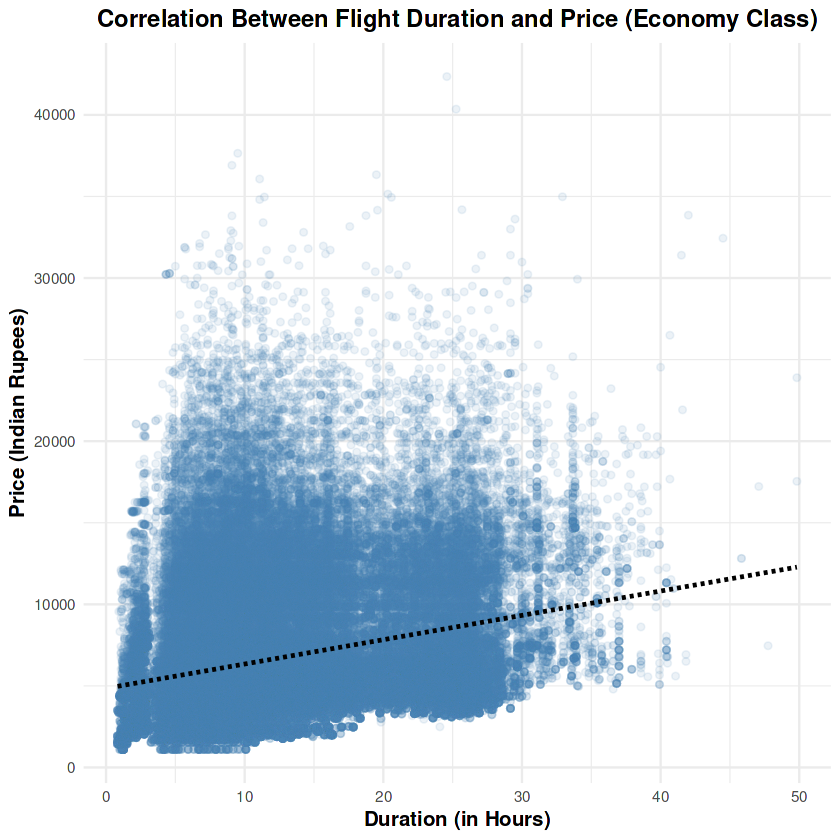

In [47]:
ggplot(data = duration_and_cost_economy, aes(x = duration, y = price)) +
  geom_point(alpha = 0.1, color = "steelblue") + #I have reduced the alpha to improve visibility
  
  #using geom_smooth I have added a linear trend line to the plot
  geom_smooth(method = "lm", se = FALSE, color = "black", linetype = "dashed") +
  
  labs(
    title = "Correlation Between Flight Duration and Price (Economy Class)",
    x = "Duration (in Hours)",
    y = "Price (Indian Rupees)"
  ) +
  
  # I have found a new command which helps improve readability
  theme_minimal() +
  
  # customize the title for visual appeal
  theme(
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5, size = 10, face = "italic"),
    axis.title = element_text(size = 12, face = "bold")
  )
ggsave("/kaggle/working/Q3_2.png")

In [58]:
duration_and_cost_economy <- flight_data %>% filter(class == "Economy", duration < 40) %>%  
mutate(duration_rounded = round(duration)) %>% group_by(duration_rounded) %>% summarise(
    Average_Price = mean(price, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  arrange(desc(Average_Price))

Because prices vary in a wide range I came up with the idea, to examine the trend better. I have rounded the duration of flights, and calculated an average ticket price to each duration. Then plotted these newly calculated values. By doing this little trick I significantly reduced the data points while kept the meaning behind them and we can we that the duration and price is indeed correlated.

`geom_smooth()` using formula = 'y ~ x'
Saving 12.5 x 6.67 in image
`geom_smooth()` using formula = 'y ~ x'


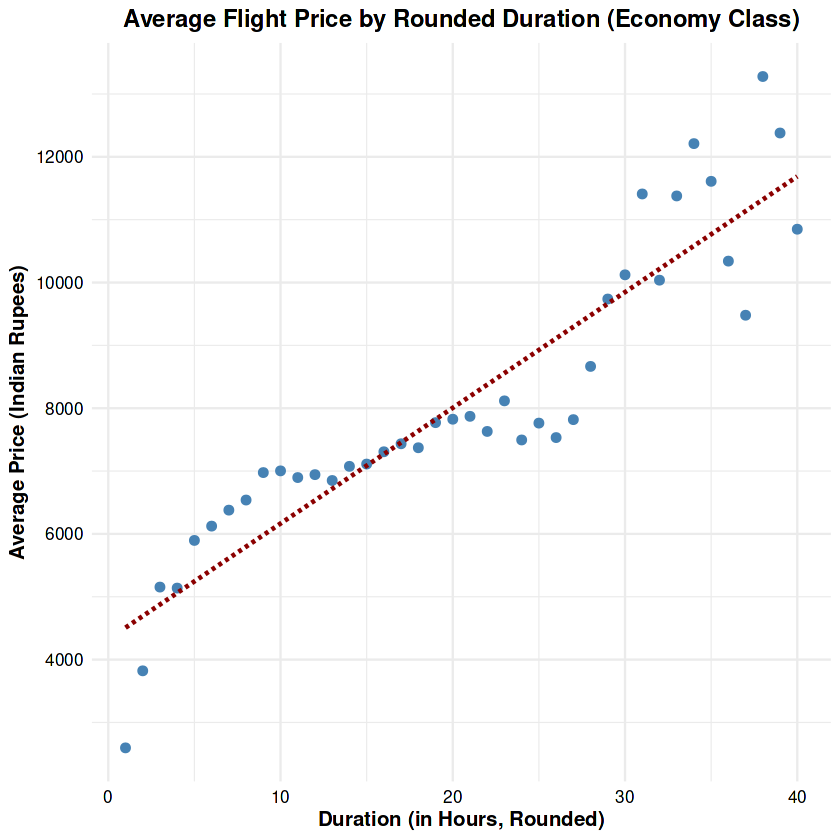

In [62]:
ggplot(data = duration_and_cost_economy, aes(x = duration_rounded, y = Average_Price)) +
  geom_point(color = "steelblue", size = 2) +
  
  # using geom_smooth we plotted a trend line on the scatterplot
  geom_smooth(method = "lm", se = FALSE, color = "darkred", linetype = "dashed") +
  
  
  labs(
    title = "Average Flight Price by Rounded Duration (Economy Class)",
    x = "Duration (in Hours, Rounded)",
    y = "Average Price (Indian Rupees)"
  ) +
  
  
  theme_minimal() +
  

  theme(
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5, size = 12, face = "italic"),
    axis.title = element_text(size = 12, face = "bold"),
    axis.text.x = element_text(size = 10, color = "black"),
    axis.text.y = element_text(size = 10, color = "black")
  )
ggsave("/kaggle/working/Q3_3.png")

### Question 4:
#### How does the ”days left” until departure influence the ticket price? Is there an optimal booking Window for the lowest prices?



In [75]:
day_left_price <- flight_data %>% filter(class == "Economy", duration < 40) %>% group_by(days_left) %>% summarise(
    Average_Price = mean(price, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  arrange(desc(Average_Price))

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Saving 12.5 x 6.67 in image
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


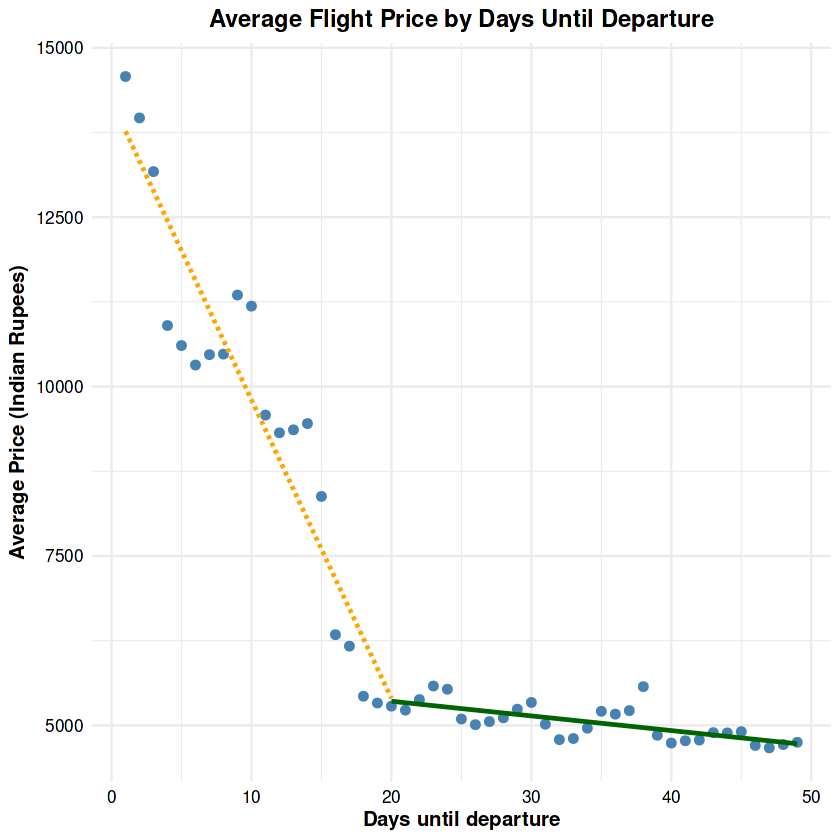

In [86]:
ggplot(data = day_left_price, aes(x = days_left, y = Average_Price)) +
  # I used a scatter plot
  geom_point(color = "steelblue", size = 2) +
  
  # first trendline: for days_left >= 20
  geom_smooth(
    data = filter(day_left_price, days_left >= 20),
    method = "lm",
    se = FALSE,
    color = "darkgreen",
    linetype = "solid",
    alpha = 0.2
  ) +
  
  # second trendline : for days_left < 21
  geom_smooth(
    data = filter(day_left_price, days_left < 21),
    method = "lm",
    se = FALSE,
    color = "orange",
    linetype = "dashed",
    alpha = 0.2
  ) +
  
  labs(
    title = "Average Flight Price by Days Until Departure",
    x = "Days until departure",
    y = "Average Price (Indian Rupees)"
  ) +
  
  theme_minimal() +
  
  theme(
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
    axis.title = element_text(size = 12, face = "bold"),
    axis.text.x = element_text(size = 10, color = "black"),
    axis.text.y = element_text(size = 10, color = "black")
  )
ggsave("/kaggle/working/Q4_4.png")

### Question 5:
#### Are there specific departure or arrival times (e.g., Early Morning, Evening, Night) that consistently correlate with higher or lower flight prices?


In [22]:
deptime_price <- flight_data %>% 
  filter(class == "Economy", duration < 40) %>%
  group_by(departure_time) %>% 
  summarise(
    Average_Price = mean(price, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  arrange(desc(Average_Price))


Saving 12.5 x 6.67 in image


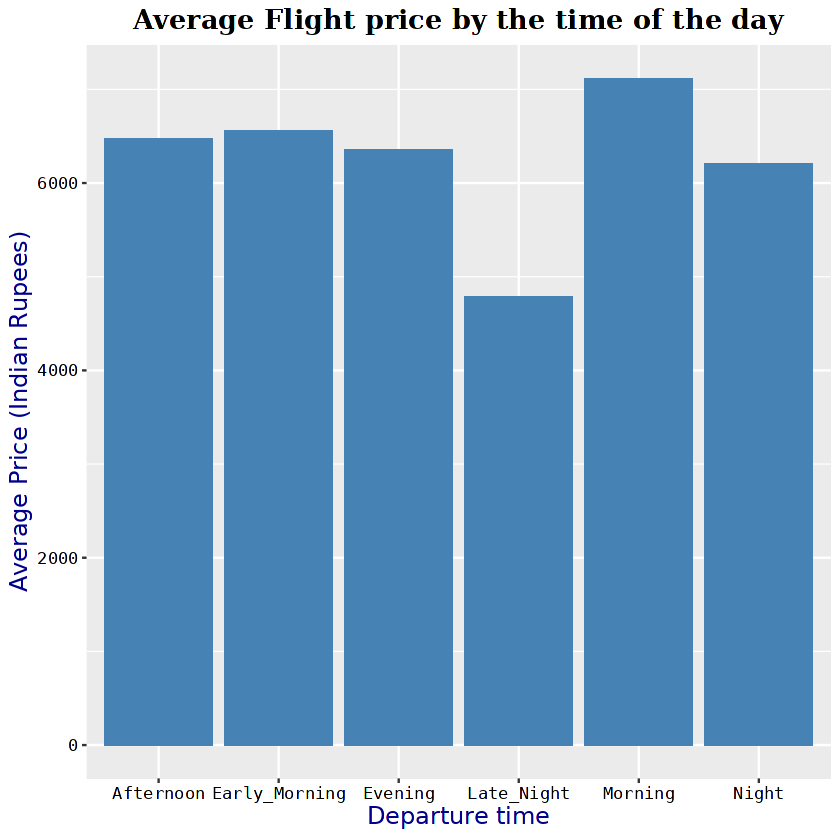

In [91]:
ggplot(data = deptime_price ) +
  geom_col(mapping = aes(x = departure_time, y = Average_Price), fill = "steelblue" ) +
  labs(
    x = "Departure time",
    y = "Average Price (Indian Rupees)",
    title = "Average Flight price by the time of the day",
  ) +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16, face = "bold", family = "serif"),
    axis.title.x = element_text(size = 14, face = "italic", color = "darkblue", family = "sans"),
    axis.title.y = element_text(size = 14, face = "italic", color = "darkblue", family = "sans"),
    axis.text.x = element_text(size = 10, color = "black", family = "mono"), # Rotate text
    axis.text.y = element_text(size = 10, color = "black", family = "mono"),
   
  )
ggsave("/kaggle/working/Q5_45.png")